In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.checkpoint.memory import MemorySaver

In [3]:
from langgraph.graph.message import add_messages # to add messages in the list used instead of reducer function operator.add

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [4]:
llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash')


def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [5]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=checkpointer)

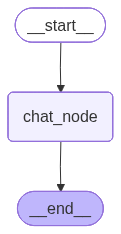

In [6]:
chatbot

In [ ]:
# initial_state = {
#     'messages': [HumanMessage(content = 'What is the capital of india')]
# }
# chatbot.invoke(initial_state)['messages'][-1].content

'The capital of India is **New Delhi**.'

In [7]:
thread_id = '1'

while True:

    user_message = input('Typer here: ')

    print('User:', user_message)

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break

    config = {'configurable': {'thread_id': thread_id}}
    response = chatbot.invoke({'messages': [HumanMessage(content = user_message)]}, config=config)

    print('AI:', response['messages'][-1].content)

User: Hi
AI: Hi there! How can I help you today?
User: can you add 100 +200
AI: 100 + 200 = 300
User: thanks. now multiply it by 2
AI: 300 * 2 = 600
User: great now divide by 20
AI: 600 / 20 = 30
User: exit


In [9]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='fee4242c-889d-4def-8b91-61833e7db218'), AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--eaa6738e-5251-4f88-94bb-000bb59627cc-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='can you add 100 +200', additional_kwargs={}, response_metadata={}, id='abbe0d5d-bd50-46ff-8bed-fa4c1ed62561'), AIMessage(content='100 + 200 = 300', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--4126fa57-a831-4b32-b50e-16088635433a-0', usage_metadata={'input_tokens': 22, 'output_tokens': 14, 'total_tokens': 36, 'input_token_details': {